# Smart Planning V3 : appreciation model 1 - appreciation
  
### Details 

- Problem : `Classification`

- dataSet : deleted `nombre de seances hors disponibilités d'intervenant` feature as it is handled by the planning generator software

- label & features values are Classes ( Excellent, VeryGood, Good, Passe, Bad, veryBad) 

- features limites = [ 40, 30, 25, 15, 10] 

- label limits : [ 5, 6, 7, 8, 9]
    

- Models :
    * XGBoost 
    * SVM
    * Random forest 
    * Logistic Regression classifier => bad choice ; it is used with less features, and with more data, correlated features
    * ANN Classifier : MLPClassifier
    * Decision Tree

<br>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sn
import sklearn
%matplotlib inline
# scikit-learn==1.1.1 #scikit version

<br> 

# Get the dataset

In [6]:
df = pd.read_excel('dataset-classification-multiple.xlsx')
df.head()

,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent
1,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent
2,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,Excellent
3,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent
4,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,Excellent,Excellent,Excellent


<br>

# Quick look on the dataset

In [7]:
print("# DataSet shape : ", df.shape)
df.describe()
# no missing values

# DataSet shape :  (158, 13)


,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
count,158,158,158,158,158,158,158,158,158,158,158,158,158
unique,6,6,6,6,6,6,6,6,6,6,6,6,6
top,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Bad
freq,65,55,59,61,58,59,59,56,64,59,63,63,31


<br>

# Preprocessing data :


## missing values :

In [8]:
df.isna().count()

SC_simultanite_Perc          158
salles_utilisees_Perc        158
salles_surutiliseess_Perc    158
places_videss_Perc           158
seances_samedis_Perc         158
Smidis_Perc                  158
IntvDep8Hs_Perc              158
InterDepDisp6s_Perc          158
GrpDep8Hs_Perc               158
GrpDepDisp6s_Perc            158
SDepDIntvs_Perc              158
SHPDIntvs_Perc               158
Label                        158
dtype: int64

In [9]:
df.isnull().count()

SC_simultanite_Perc          158
salles_utilisees_Perc        158
salles_surutiliseess_Perc    158
places_videss_Perc           158
seances_samedis_Perc         158
Smidis_Perc                  158
IntvDep8Hs_Perc              158
InterDepDisp6s_Perc          158
GrpDep8Hs_Perc               158
GrpDepDisp6s_Perc            158
SDepDIntvs_Perc              158
SHPDIntvs_Perc               158
Label                        158
dtype: int64

> No missing/null values

## Eliminate duplicated rows

In [10]:
df.duplicated().sum()

8

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df = df.reset_index()
df.head(2)

,index,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,0,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent
1,1,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent


In [14]:
df = df.drop(columns=['index'])

In [15]:
df.head(2)

,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent
1,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent


<br>

## Splitting DataSet : test & train sets > stratified splitting


In [16]:
"""
# one kind of splitting

from zlib import crc32

# this function is used to have the same dataSet split over multiple runs, it uses rows index 
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# now data set is being splitted
def split_train_test_by_id(data, test_ratio):
    ids = pd.Series(range(len(data)))
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

train_set, test_set = split_train_test_by_id(df, 0.16)
"""

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=77 )
for train_index, test_index in split.split(df, df["Label"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]


In [17]:
train_set.head()

,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
79,Excellent,Good,Good,Excellent,Very Good,Very Good,Pass,Pass,Excellent,Good,Good,Very Good,Pass
17,Excellent,Very Good,Excellent,Very Good,Excellent,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,Excellent,Very Good
78,Very Good,Good,Very Good,Good,Very Good,Very Good,Good,Good,Pass,Bad,Excellent,Good,Pass
34,Excellent,Excellent,Very Good,Very Good,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,Very Good
90,Bad,Very Good,Excellent,Good,Bad,Bad,Bad,Bad,Bad,Very Good,Excellent,Good,Bad


In [18]:
column_names = list(test_set.columns)
test_set.head()

,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
133,Bad,Very Good,Very Bad,Good,Good,Good,Very Bad,Very Bad,Very Bad,Bad,Very Bad,Very Good,Very Bad
76,Pass,Excellent,Excellent,Excellent,Very Good,Very Good,Good,Good,Good,Pass,Excellent,Good,Pass
32,Very Good,Very Good,Excellent,Very Good,Excellent,Excellent,Very Good,Very Good,Excellent,Excellent,Excellent,Excellent,Very Good
140,Very Bad,Very Bad,Very Bad,Very Bad,Very Bad,Very Bad,Very Bad,Very Bad,Good,Pass,Very Good,Pass,Very Bad
112,Good,Good,Good,Good,Very Good,Very Good,Bad,Bad,Pass,Good,Good,Pass,Bad


In [19]:
# Stratified splitting : 
feature = 'Good'

print(" '"+feature+"' label in test set  : ",len(test_set[test_set['Label']==feature])/len(test_set) )
print(" '"+feature+"' label in train set  : ",len(train_set[train_set['Label']==feature])/len(train_set) )

print(" '"+feature+"' label in the main set df:  ", len(df[df['Label']==feature])/len(df))

# the two values are slightly the same, the difference is due to the small dataset i used  (same for other labels)

 'Good' label in test set  :  0.16666666666666666
 'Good' label in train set  :  0.16666666666666666
 'Good' label in the main set df:   0.16666666666666666


<br>

## Encoding values : OrdinalEncoder


In [20]:

categories = [ 'Very Bad', 'Bad', 'Pass', 'Good', 'Very Good','Excellent']
n_cats =   [ categories, categories, categories, categories, categories, categories, categories, categories, categories, categories, categories, categories, categories]
n_cats

[['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
 ['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent']]

In [21]:
# trnsforme categorical values into numerical ones
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories= n_cats)
train_set_encoded = ordinal_encoder.fit_transform(train_set)
test_set_encoded = ordinal_encoder.fit_transform(test_set)
train_set_encoded[:8] # 8 rows

array([[5., 3., 3., 5., 4., 4., 2., 2., 5., 3., 3., 4., 2.],
       [5., 4., 5., 4., 5., 5., 5., 5., 5., 4., 5., 5., 4.],
       [4., 3., 4., 3., 4., 4., 3., 3., 2., 1., 5., 3., 2.],
       [5., 5., 4., 4., 5., 5., 5., 5., 5., 5., 4., 5., 4.],
       [1., 4., 5., 3., 1., 1., 1., 1., 1., 4., 5., 3., 1.],
       [4., 1., 1., 2., 3., 3., 3., 3., 2., 3., 3., 3., 0.],
       [0., 3., 3., 2., 4., 4., 1., 1., 5., 3., 3., 5., 0.],
       [5., 5., 5., 3., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [22]:
ordinal_encoder.categories_


[array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dtype=object),
 array(['Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent'],
       dty

### saving encoder

In [ ]:
pickle.dump( best_model_yet, open('model1.pkl', 'wb'))

<br>

## Scal data


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_encoded_scaled = scaler.fit_transform(train_set_encoded)
test_set_encoded_scaled = scaler.transform(test_set_encoded)


<br>

# Get insights from the dataset


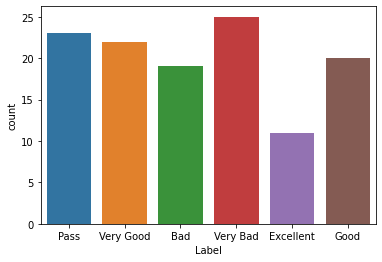

In [37]:
sn.countplot(x = 'Label',data = train_set )
plt.show()

In [21]:
train_set_encoded_pd = pd.DataFrame( data=train_set_encoded, columns=column_names)
train_set_encoded_pd.head()


,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,5.0,3.0,3.0,5.0,4.0,4.0,2.0,2.0,5.0,3.0,3.0,4.0,2.0
1,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0
2,4.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,1.0,5.0,3.0,2.0
3,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0
4,1.0,4.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,5.0,3.0,1.0


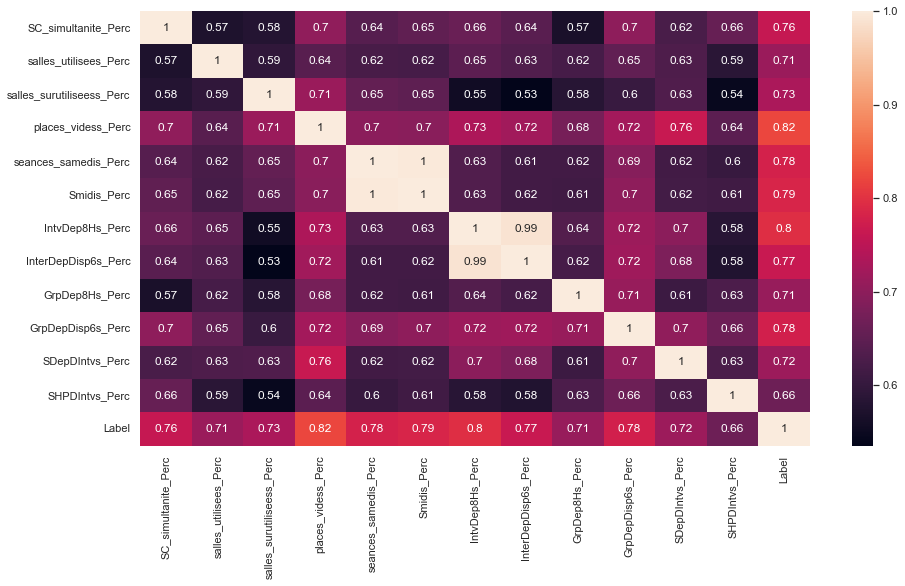

In [22]:
sn.set(rc = {'figure.figsize':(15,8)})
corr_mat = train_set_encoded_pd.corr()
sn.heatmap(corr_mat, annot=True)
plt.show() 

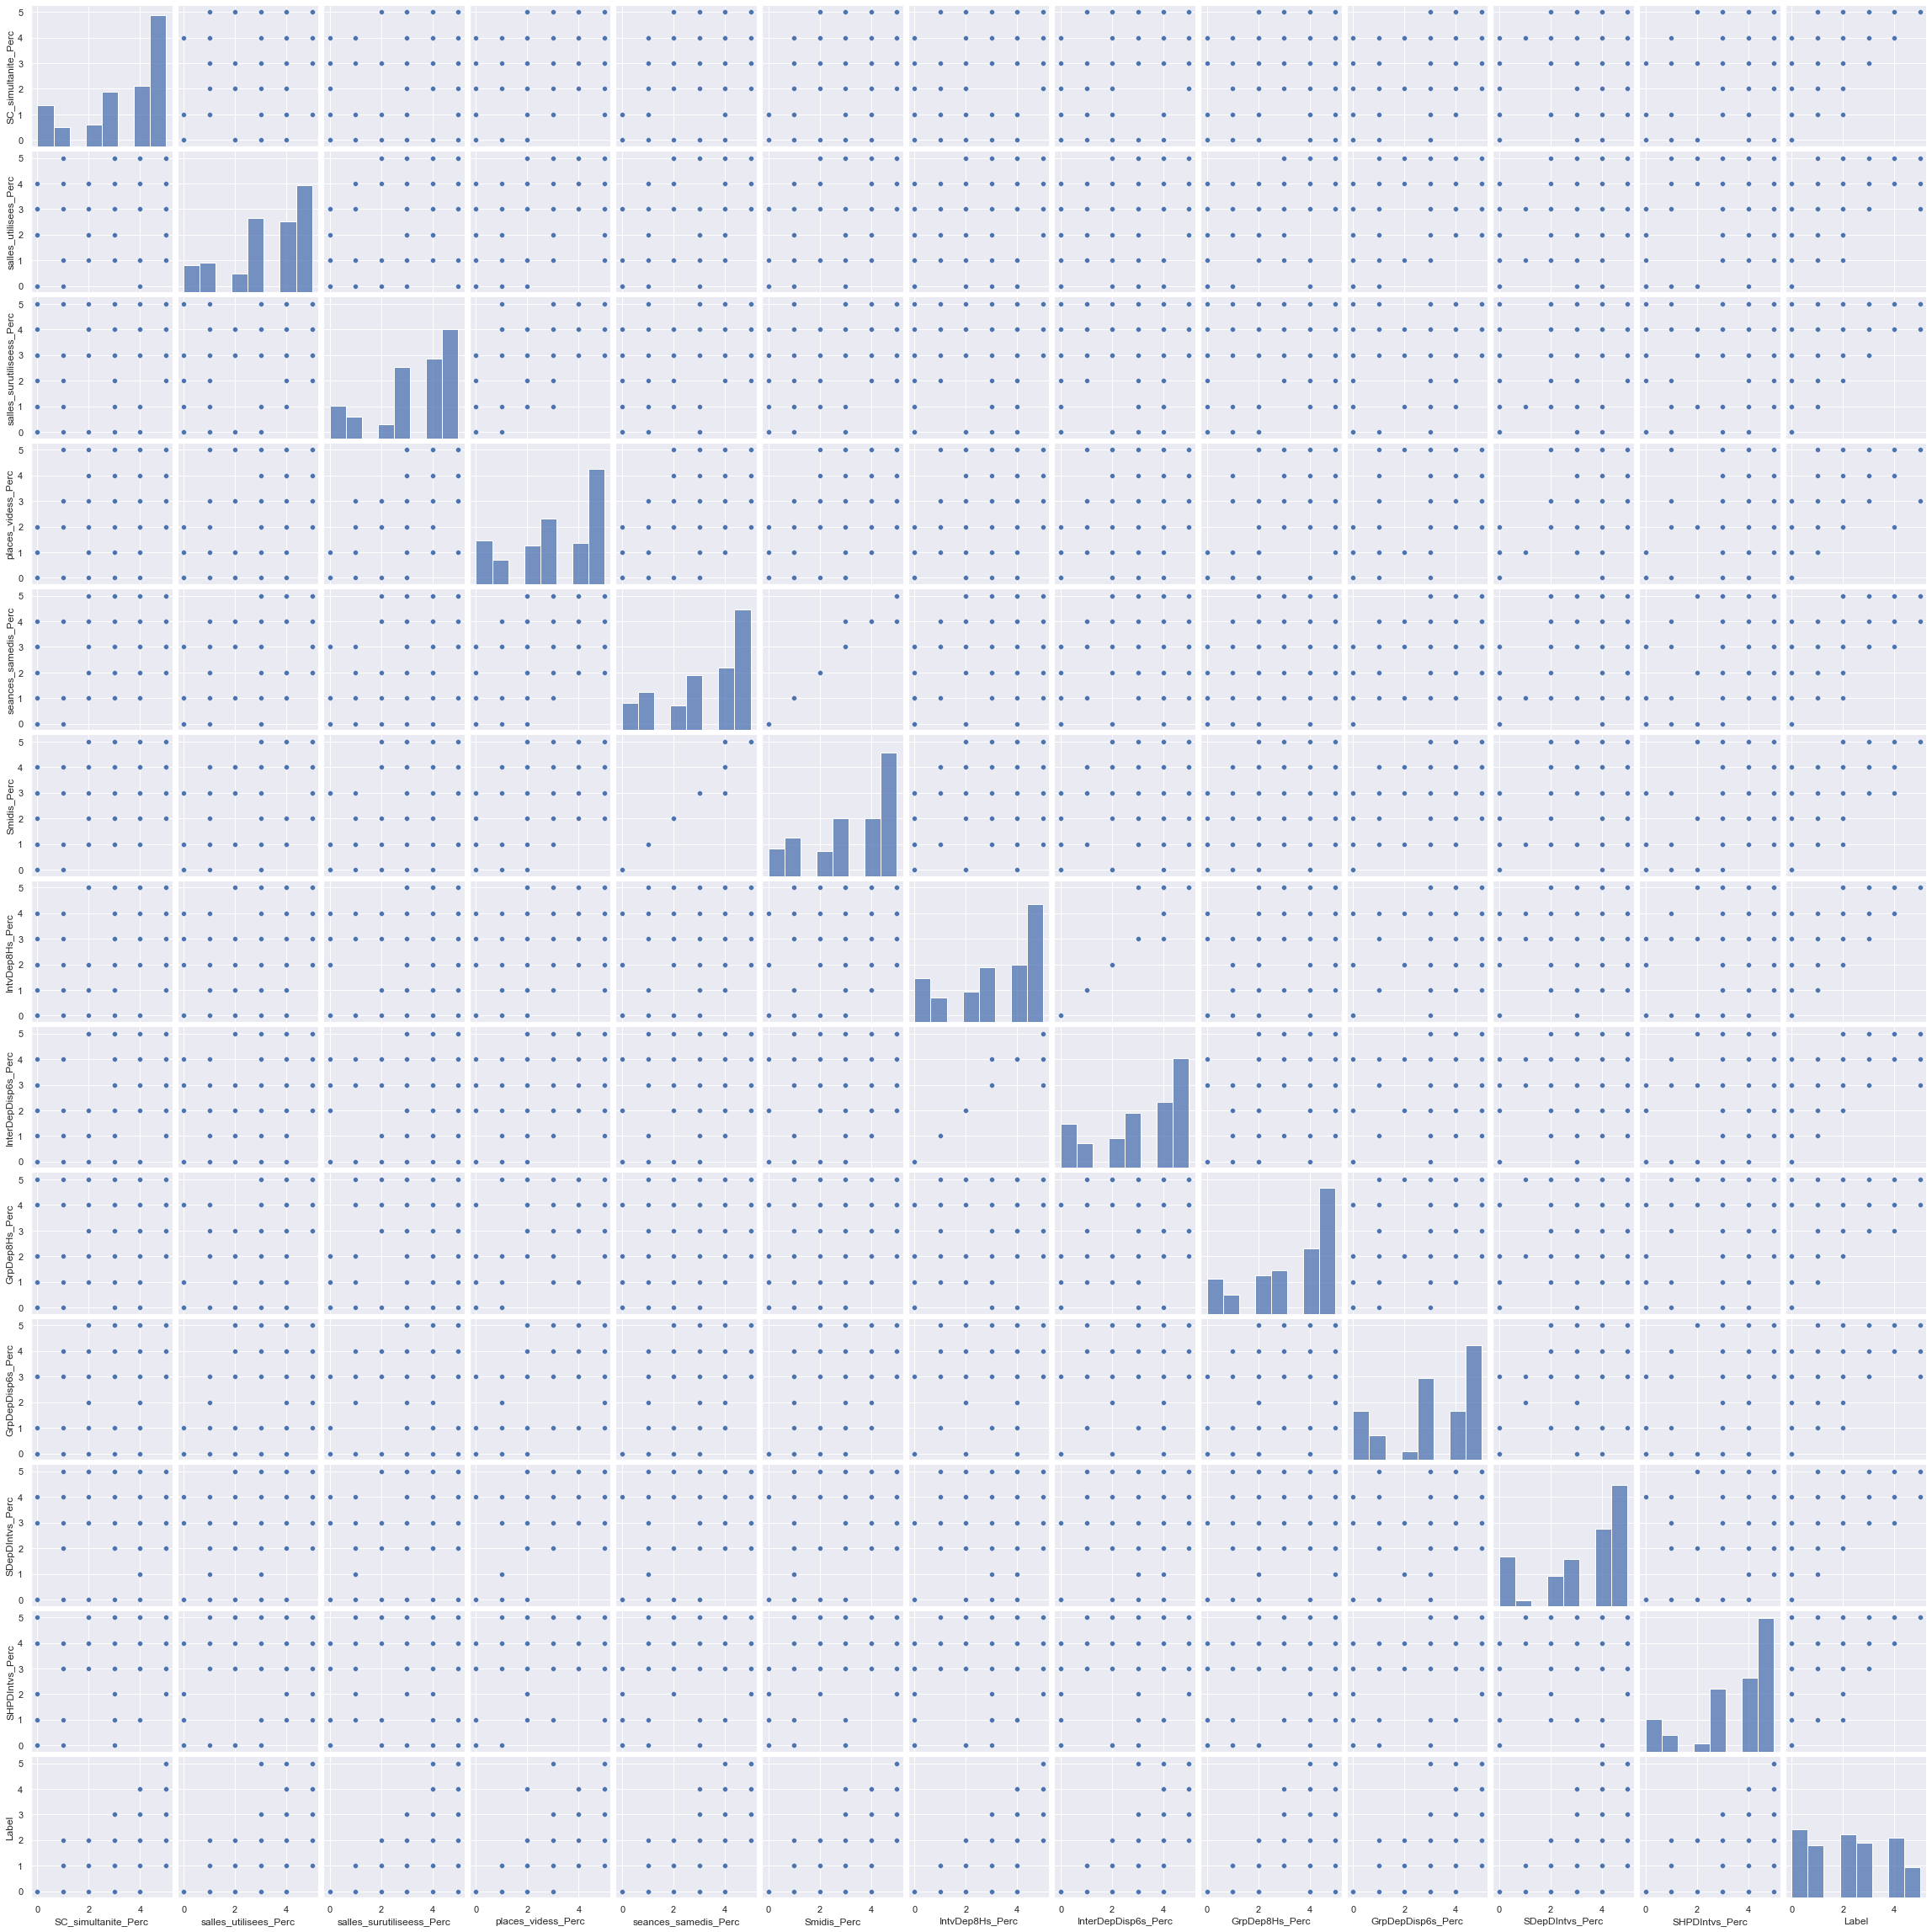

In [23]:
# Pairplot : better to open the image in a new tab
sn.set(rc = {'figure.figsize':(80,80)}) 
sn.pairplot(data = train_set_encoded_pd) # same as the one before, here we can present 3 variables in the same graph, for example 'Label'
plt.show()            # Variable but using color (intensity?) hue; added the argument hue="Label" to pairplot()

from xgboost import XGBClassifierfrom sklearn.model_selection import GridSearchCV<br> <br>

# Train Models




In [24]:
# set scoring method 
scoring =  ( "roc_auc_ovr_weighted", 'f1_weighted', 'neg_mean_squared_error')
refit = 'roc_auc_ovr_weighted' # refits an estimator on the whole dataset with the parameter setting that has the best cross-validated roc_auc_ovr_weighted score.


 <br>
 
##  XGBoost algorithme

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score, roc_auc_score

param_grid = [
     {
        'n_estimators': [ 8, 10, 13, 15, 16, 21, 25, 30, 35], 
        'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 2],
        'gamma': [0.1, 0.3, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 2],
     },
 ]
xgb = XGBClassifier(use_label_encoder=False, verbosity = 0)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_encoded[:,:12], train_set_encoded[:,12])


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, verbosity=0),
             param_grid=[{'gamma': [0.1, 0.3, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 2],
                          'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 2],
                          'n_estimators': [8, 10, 13, 15, 16, 21, 25, 30, 35]}],
             refit='roc_auc_ovr_weighted', return_train_score=True,
             scoring=('roc_auc_ovr_weighted', 'f1_weighted',
                      'neg_mean_squared_error'))

In [26]:
xgb = grid_search.best_estimator_ # best estimator
xgb


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.3, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=25, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [27]:
# training results & metrics 
xgbost_cv_tr = [ 
      grid_search.cv_results_['mean_test_roc_auc_ovr_weighted'].max() , # roc
      grid_search.cv_results_['mean_test_f1_weighted'].max(), # f1
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
xgbost_cv_tr

[0.9328120965292017,
 0.7235215247715248,
 0.6416666666666667,
 0.8010409893798611,
 0.07810378074645996]

### Evaluation of the model using the test set :

In [28]:
# testing results & metrics 

final_model = grid_search.best_estimator_
X_test = test_set_encoded[:,:12]
y_test = test_set_encoded[:,12]
final_predictions = final_model.predict(X_test)
final_probas = final_model.predict_proba(X_test)

xgbost_test_scores = [
    roc_auc_score( np.int64(y_test).tolist(), final_probas.tolist(), multi_class="ovr"), # roc
    f1_score(y_test, final_predictions, average="weighted"), # f1
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

xgbost_test_scores


[0.9804259259259259,
 0.7452214452214451,
 0.3333333333333333,
 0.5773502691896257]


 <br>
 
 
## SVM algorithme


In [29]:
from sklearn.svm import SVC

In [30]:
param_grid = [
    {
        'C': [ 3, 8, 10, 13, 15, 16, 21, 30, 35], 
        'kernel': [ 'rbf', 'poly', 'sigmoid'],
        'random_state': [  0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
        'gamma': [ 0.01, 0.06, 0.1, 0.3, 0.5, 0.7, 0.9, 2],
    },
    {
        'C': [ 3, 8, 10, 13, 15, 16, 21, 30, 35], 
        'kernel': [ 'linear'],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
     },
 ]
svc = SVC( probability=True )
grid_search = GridSearchCV( svc, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_encoded[:,:12], train_set_encoded[:,12])


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [3, 8, 10, 13, 15, 16, 21, 30, 35],
                          'gamma': [0.01, 0.06, 0.1, 0.3, 0.5, 0.7, 0.9, 2],
                          'kernel': ['rbf', 'poly', 'sigmoid'],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]},
                         {'C': [3, 8, 10, 13, 15, 16, 21, 30, 35],
                          'kernel': ['linear'],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]}],
             refit='roc_auc_ovr_weighted', return_train_score=True,
             scoring=('roc_auc_ovr_weighted', 'f1_weighted',
                      'neg_mean_squared_error'))

In [31]:
svc = grid_search.best_estimator_ # best estimator
svc

SVC(C=21, gamma=0.06, probability=True, random_state=3)

In [32]:
# training results & metrics 
svc_cv_tr = [ 
      grid_search.cv_results_['mean_test_roc_auc_ovr_weighted'].max() , # roc
      grid_search.cv_results_['mean_test_f1_weighted'].max(), # f1
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
svc_cv_tr

[0.9648759683299157,
 0.7952566877566879,
 10.766666666666667,
 3.2812599206199238,
 0.015620946884155273]

### Evaluation of the model using the test set :

In [33]:
# testing results & metrics 

final_model = grid_search.best_estimator_
X_test = test_set_encoded[:,:12]
y_test = test_set_encoded[:,12]
final_predictions = final_model.predict(X_test)
final_probas = final_model.predict_proba(X_test)

svc_test_scores = [
    roc_auc_score( np.int64(y_test).tolist(), final_probas.tolist(), multi_class="ovr"), # roc
    f1_score(y_test, final_predictions, average="weighted"), # f1
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

svc_test_scores


[0.996, 0.8945454545454545, 0.1, 0.31622776601683794]


 <br>
 
 
## Random Forest algorithme


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
param_grid = [
    {
        'n_estimators': [ 3, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 25], 
        'max_features': [ 2, 4, 5, 6, 7, 8, 9, 10, 12],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
    },
    {
        'bootstrap': [False], 
        'n_estimators': [ 3, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 22, 25], 
        'max_features': [ 2, 4, 5, 6, 7, 8, 9, 10, 12],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
    },
]
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_encoded[:,:12], train_set_encoded[:,12])


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 5, 6, 7, 8, 9, 10, 12],
                          'n_estimators': [3, 8, 10, 12, 13, 14, 15, 16, 17, 18,
                                           19, 22, 25],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]},
                         {'bootstrap': [False],
                          'max_features': [2, 4, 5, 6, 7, 8, 9, 10, 12],
                          'n_estimators': [3, 8, 10, 12, 13, 14, 15, 16, 17, 18,
                                           19, 22, 25],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]}],
             refit='roc_auc_ovr_weighted', return_train_score=True,
             scoring=('roc_auc_ovr_weighted', 'f1_weighted',
                      'neg_mean_squared_error'))

In [36]:
forest = grid_search.best_estimator_ # best estimator
forest

RandomForestClassifier(max_features=4, n_estimators=25, random_state=1)

In [37]:
# training results & metrics 
rf_cv_tr = [ 
      grid_search.cv_results_['mean_test_roc_auc_ovr_weighted'].max() , # roc
      grid_search.cv_results_['mean_test_f1_weighted'].max(), # f1
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
rf_cv_tr

[0.9507268645097593,
 0.780223063973064,
 1.2,
 1.0954451150103321,
 0.0624699592590332]

### Evaluation of the model using the test set :

In [38]:
# testing results & metrics 

final_model = grid_search.best_estimator_
X_test = test_set_encoded[:,:12]
y_test = test_set_encoded[:,12]
final_predictions = final_model.predict(X_test)
final_probas = final_model.predict_proba(X_test)

rf_test_scores = [
    roc_auc_score( np.int64(y_test).tolist(), final_probas.tolist(), multi_class="ovr"), # roc
    f1_score(y_test, final_predictions, average="weighted"), # f1
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

rf_test_scores


[0.9374264403292182,
 0.7157808857808857,
 0.26666666666666666,
 0.5163977794943222]


 <br>
 
 
## Logistic Regression algorithme


In [39]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = [
    {
        'C': [ 0.01, 0.1, 1, 1.3, 2, 3, 4], 
        'solver': [ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33, 77],
        'max_iter': [ 30, 50, 70]
    },
]
lr = LogisticRegression()
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_encoded[:,:12], train_set_encoded[:,12])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
lr = grid_search.best_estimator_ # best estimator
lr

In [ ]:
# training results & metrics 
lr_cv_tr = [ 
      grid_search.cv_results_['mean_test_roc_auc_ovr_weighted'].max() , # roc
      grid_search.cv_results_['mean_test_f1_weighted'].max(), # f1
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
lr_cv_tr

### Evaluation of the model using the test set :

In [ ]:
# testing results & metrics 

final_model = grid_search.best_estimator_
X_test = test_set_encoded[:,:12]
y_test = test_set_encoded[:,12]
final_predictions = final_model.predict(X_test)
final_probas = final_model.predict_proba(X_test)

lr_test_scores = [
    roc_auc_score( np.int64(y_test).tolist(), final_probas.tolist(), multi_class="ovr"), # roc
    f1_score(y_test, final_predictions, average="weighted"), # f1
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

lr_test_scores



 <br>
 
 
## ANN MLPClassifier algorithme


In [ ]:
from sklearn.neural_network import MLPClassifier

In [45]:
param_grid = [
    {
        'hidden_layer_sizes': [ (12, 12, 12, 12, 6)],
        'activation': [ 'relu', 'logistic', 'identity', 'tanh' ], 
        'solver': [ 'sgd', 'lbfgs', 'adam'], # adam , sgd
        'alpha': [ 0.001, 0.01, 0.0001, 0.00001],
        'learning_rate':[ 'constant', 'adaptive'],
        'random_state': [ 0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43, 33, 77],
        'max_iter':[ 35, 50 ],
    },
]
mlp = MLPClassifier(verbose=False)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_encoded[:,:12], train_set_encoded[:,12])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilaye

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'activation': ['relu', 'logistic', 'identity',
                                         'tanh'],
                          'alpha': [0.001, 0.01, 0.0001, 1e-05],
                          'hidden_layer_sizes': [(12, 12, 12, 12, 6)],
                          'learning_rate': ['constant', 'adaptive'],
                          'max_iter': [35, 50],
                          'random_state': [0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33, 77],
                          'solver': ['sgd', 'lbfgs', 'adam']}],
             refit='roc_auc_ovr_weighted', return_train_score=True,
             scoring=('roc_auc_ovr_weighted', 'f1_weighted',
                      'neg_mean_squared_error'))

In [46]:
mlp = grid_search.best_estimator_ # best estimator
mlp

MLPClassifier(activation='identity', alpha=0.01,
              hidden_layer_sizes=(12, 12, 12, 12, 6), max_iter=50,
              random_state=0, solver='lbfgs')

In [47]:
# training results & metrics 
mlp_cv_tr = [ 
      grid_search.cv_results_['mean_test_roc_auc_ovr_weighted'].max() , # roc
      grid_search.cv_results_['mean_test_f1_weighted'].max(), # f1
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
mlp_cv_tr

[0.9459741683754841,
 0.6856975431975432,
 10.316666666666666,
 3.2119568282694377,
 0.06248641014099121]

### Evaluation of the model using the test set :

In [48]:
# testing results & metrics 

final_model = grid_search.best_estimator_
X_test = test_set_encoded[:,:12]
y_test = test_set_encoded[:,12]
final_predictions = final_model.predict(X_test)
final_probas = final_model.predict_proba(X_test)

mlp_test_scores = [
    roc_auc_score( np.int64(y_test).tolist(), final_probas.tolist(), multi_class="ovr"), # roc
    f1_score(y_test, final_predictions, average="weighted"), # f1
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

mlp_test_scores


[0.9730010288065843,
 0.8519191919191919,
 0.13333333333333333,
 0.3651483716701107]


 <br>
 
 
## Decision Tree classifier


In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
param_grid = [
    {
        'criterion': [ "gini", "entropy", "log_loss" ],
        'random_state': [ 0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43, 33, 77],
        'ccp_alpha':[ 0, 0.1, 0.01, 1, 1.4, 2, 3, 5, 7 ],
        'splitter':["best", "random"],
    },
]
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_encoded[:,:12], train_set_encoded[:,12])


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'ccp_alpha': [0, 0.1, 0.01, 1, 1.4, 2, 3, 5, 7],
                          'criterion': ['gini', 'entropy', 'log_loss'],
                          'random_state': [0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33, 77],
                          'splitter': ['best', 'random']}],
             refit='roc_auc_ovr_weighted', return_train_score=True,
             scoring=('roc_auc_ovr_weighted', 'f1_weighted',
                      'neg_mean_squared_error'))

In [51]:
dt = grid_search.best_estimator_ # best estimator
dt

DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', random_state=7,
                       splitter='random')

In [52]:
# training results & metrics 
dt_cv_tr = [ 
      grid_search.cv_results_['mean_test_roc_auc_ovr_weighted'].max() , # roc
      grid_search.cv_results_['mean_test_f1_weighted'].max(), # f1
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
dt_cv_tr

[0.8324776904382167, 0.6468566156066157, 7.65, 2.7658633371878665, 0.0]

### Evaluation of the model using the test set :

In [53]:
# testing results & metrics 

final_model = grid_search.best_estimator_
X_test = test_set_encoded[:,:12]
y_test = test_set_encoded[:,12]
final_predictions = final_model.predict(X_test)
final_probas = final_model.predict_proba(X_test)

dt_test_scores = [
    roc_auc_score( np.int64(y_test).tolist(), final_probas.tolist(), multi_class="ovr"), # roc
    f1_score(y_test, final_predictions, average="weighted"), # f1
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

dt_test_scores


[0.8611712962962962, 0.4527370777370778, 0.5666666666666667, 0.752772652709081]

# Final Comparaison table

## trainning results 

In [54]:
pd.DataFrame({  
        'Model' : [ 
            'XGBost',  
            'svm-SVC',
            'RandomForest',
            'Logistic Regression',
            'MLPClassifier (ANN)',
            'Decision Tree',
        ],
        'train_mse' : [ tab[2] for tab in [  xgbost_cv_tr, svc_cv_tr, rf_cv_tr, lr_cv_tr, mlp_cv_tr, dt_cv_tr] ],
        'train_rmse' : [ 
            tab[3] for tab in [  xgbost_cv_tr, svc_cv_tr, rf_cv_tr, lr_cv_tr, mlp_cv_tr, dt_cv_tr]
        ],
        'train_refit_time' : [ 
            tab[4] for tab in [  xgbost_cv_tr, svc_cv_tr, rf_cv_tr, lr_cv_tr, mlp_cv_tr, dt_cv_tr]
        ],
        'train_F1_score' : [ 
            tab[1] for tab in [  xgbost_cv_tr, svc_cv_tr, rf_cv_tr, lr_cv_tr, mlp_cv_tr, dt_cv_tr]
        ],
        'train_roc_score' : [ 
            tab[0] for tab in [  xgbost_cv_tr, svc_cv_tr, rf_cv_tr, lr_cv_tr, mlp_cv_tr, dt_cv_tr]
        ],
})



,Model,train_mse,train_rmse,train_refit_time,train_F1_score,train_roc_score
0,XGBost,0.641667,0.801041,0.078104,0.723522,0.932812
1,svm-SVC,10.766667,3.281260,0.015621,0.795257,0.964876
2,RandomForest,1.200000,1.095445,0.062470,0.780223,0.950727
3,Logistic Regression,3.441667,1.855173,0.124970,0.659543,0.941736
4,MLPClassifier (ANN),10.316667,3.211957,0.062486,0.685698,0.945974
5,Decision Tree,7.650000,2.765863,0.000000,0.646857,0.832478


## Testing results 

In [295]:
pd.DataFrame({  
        'Model' : [ 
            'XGBost',  
            'svm-SVC',
            'RandomForest',
            'Logistic Regression',
            'MLPClassifier (ANN)',
            'Decision Tree',
        ],
        'Test_mse' : [ 
            tab[2] for tab in [  xgbost_test_scores, svc_test_scores, rf_test_scores, lr_test_scores, mlp_test_scores, dt_test_scores]
        ],
        'Test_rmse' : [ 
            tab[3] for tab in [  xgbost_test_scores, svc_test_scores, rf_test_scores, lr_test_scores, mlp_test_scores, dt_test_scores]
        ],
        'Test_F1_score' : [ 
            tab[1] for tab in [  xgbost_test_scores, svc_test_scores, rf_test_scores, lr_test_scores, mlp_test_scores, dt_test_scores]
        ],
        'Test_roc_score' : [ 
            tab[0] for tab in [  xgbost_test_scores, svc_test_scores, rf_test_scores, lr_test_scores, mlp_test_scores, dt_test_scores]
        ],
})



,Model,Test_mse,Test_rmse,Test_F1_score,Test_roc_score
0,XGBost,0.333333,0.577350,0.745221,0.980426
1,svm-SVC,0.100000,0.316228,0.894545,0.996000
2,RandomForest,0.266667,0.516398,0.715781,0.937426
3,Logistic Regression,0.233333,0.483046,0.737879,0.978917
4,MLPClassifier (ANN),0.133333,0.365148,0.851919,0.973001
5,Decision Tree,0.566667,0.752773,0.452737,0.861171


In [154]:
###
# ==> 6 classes not a percentage !!!! 0--5 
###

categories = {'Very Bad':0, 'Bad':1, 'Pass':2, 'Good':3, 'Very Good':4, 'Excellent':5}
categories_names = [ 'Very Bad', 'Bad', 'Pass', 'Good', 'Very Good', 'Excellent']

seance_en_simultanite_perc = categories['Excellent']     #   séances avec contrainte de simultanéité
salles_utilisees_perc = categories['Very Bad']          #   salles utilisées
salles_surutiliseess_Perc = categories['Excellent']      #   salles surutilisées (44Heures /Semaine)
places_videss_Perc = categories['Bad']             #    places vides
seances_samedis_Perc = categories['Very Good']           #   séances de samedi
Smidis_Perc = categories['Pass']                    #  séances de midi 
IntvDep8Hs_Perc = categories['Excellent']                #  'intervenants qui depassent 8Heures /Jour
InterDepDisp6s_Perc = categories['Excellent']            #  d'intervenants qui depassent le dispatchement 6Heures/Jour
GrpDep8Hs_Perc = categories['Excellent']                 #  groupes qui depassent 8Heures /Jour
GrpDepDisp6s_Perc = categories['Excellent']              #  groupes qui depassent le dispatchement 6Heures/Jour
SHPDIntvs_Perc = categories['Excellent']                 # séances qui dépassent la disponibilité des intrervenants
SDepDIntvs_Perc = categories['Excellent']                # séances hors préférences de disponibilités des intervenants

manual_testing_var = [ seance_en_simultanite_perc, salles_utilisees_perc, salles_surutiliseess_Perc, places_videss_Perc, seances_samedis_Perc, 
Smidis_Perc, IntvDep8Hs_Perc, InterDepDisp6s_Perc, GrpDep8Hs_Perc, GrpDepDisp6s_Perc, SHPDIntvs_Perc, SDepDIntvs_Perc]

In [364]:
pd.DataFrame({  
        'Model' : [ 
            'XGBost',  
            'svm-SVC',
            'RandomForest',
            'MLPClassifier (ANN)',
            'Logistic Regression',
            'Decision Tree',
        ],
        'Predicted string' : [ 
            categories_names[ int( xgb.predict([ manual_testing_var ]) ) ] ,
            categories_names[ int( svc.predict ([ manual_testing_var ]) ) ] ,
            categories_names[ int( forest.predict([ manual_testing_var ]) ) ] ,
            categories_names[ int( mlp.predict([ manual_testing_var ]) ) ] ,
            categories_names[ int( lr.predict([ manual_testing_var ]) ) ] ,
            categories_names[ int( dt.predict([ manual_testing_var ]) ) ] ,
        ],
        'Predicted class number' : [ 
            xgb.predict([ manual_testing_var ]) ,
            svc.predict ([ manual_testing_var ])  ,
            forest.predict([ manual_testing_var ]) ,
            mlp.predict([ manual_testing_var ]) ,
            lr.predict([ manual_testing_var ]) ,
            dt.predict([ manual_testing_var ]) ,
        ],
})



,Model,Predicted string,Predicted class number
0,XGBost,Pass,[2]
1,svm-SVC,Pass,[2.0]
2,RandomForest,Pass,[2.0]
3,MLPClassifier (ANN),Pass,[2.0]
4,Logistic Regression,Very Good,[4.0]
5,Decision Tree,Pass,[2.0]


# Best Model Selection

👉from the previous results & metrics, SVM-SVClassifier has the best scores, and yet gives reasonable & acceptable predictions after some additional manual testing with user inputs. 


In [202]:
best_model_yet = svc
best_model_yet

MLPClassifier(activation='identity', alpha=0.01,
              hidden_layer_sizes=(12, 12, 12, 12, 6), max_iter=50,
              random_state=0, solver='lbfgs')

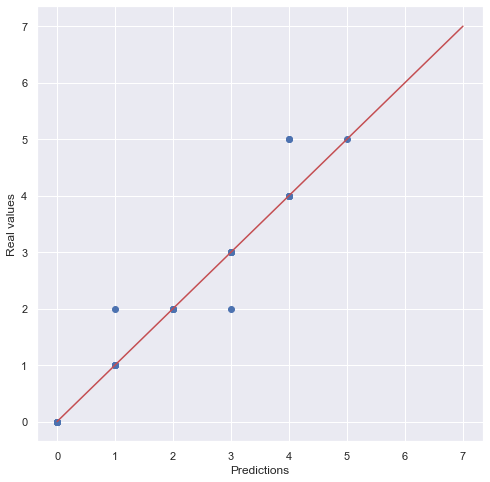

In [203]:
X_test = test_set_encoded[:,:12]
y_test = test_set_encoded[:,12]

final_predictions = best_model_yet.predict(X_test)
sn.set(rc = {'figure.figsize':(8,8)}) 
plt.plot([ i for i in range(8)],[ i for i in range(8)], "r")
plt.scatter( final_predictions, y_test)
plt.xlabel( "Predictions")
plt.ylabel( "Real values")
plt.show()

# Storing & exporting the model



## using pickle

In [42]:
import pickle

In [43]:
pickle.dump( best_model_yet, open('model1.pkl', 'wb'))

# use this Later to load the model :

pickled_model = pickle.load(open('model1.pkl', 'rb'))
#pickled_model.predict(X_test)



In [44]:
best_model_yet

SVC(C=21, gamma=0.06, probability=True, random_state=3)

## using joblib

In [187]:
import joblib

In [188]:
#perist it
joblib.dump(best_model_yet, "model1.sav")

# load it
loaded_model = joblib.load("model1.sav")

<br>
<br>

# Testing the model on real data

In [6]:
def get_appreciation_from_limits(value: int, limits =[ 500/6, 200/3, 100/2, 100/3, 100/6 ]) -> str:
    appreciations = ["Bad", "Pass", "Good", "Very Good", "Excellent"]
    if (len(appreciations) != len(limits)):
        raise AssertionError("Sizes are not the same, expecting 5 limits ! ")
    appreciation = "Very Bad"
    for i in range(len(limits)):
        if value < limits[i]:
            appreciation = appreciations[i]
    return appreciation

In [7]:

def to_multi_classification_df(tab):
    
    
    simultanite_app = get_appreciation_from_limits( tab[0] )
    salles_utilisees_app = get_appreciation_from_limits( tab[1] )
    salles_surutiliseess_app = get_appreciation_from_limits( tab[2] )
    places_videss_app = get_appreciation_from_limits( tab[3] )
    seances_samedis_app = get_appreciation_from_limits(tab[4] )
    Smidis_app = get_appreciation_from_limits(tab[5] )
    IntvDep8Hs_app = get_appreciation_from_limits(tab[6] )
    InterDepDisp6s_app = get_appreciation_from_limits(tab[7] )
    GrpDep8Hs_app = get_appreciation_from_limits( tab[8] )
    GrpDepDisp6s_app = get_appreciation_from_limits( tab[9] )
    SDepDIntvs_app = get_appreciation_from_limits( tab[10] )
    SHPDIntvs_app = get_appreciation_from_limits( tab[11]  )

    
    return [simultanite_app,
    salles_utilisees_app,
     salles_surutiliseess_app,
        places_videss_app,
        seances_samedis_app,
        Smidis_app,
        IntvDep8Hs_app,
        InterDepDisp6s_app,
        GrpDep8Hs_app,
        GrpDepDisp6s_app,
        SDepDIntvs_app,
        SHPDIntvs_app]


In [8]:
appreciations = [
        "Very Bad",
        "Bad",
        "Pass",
        "Good",
        "Very Good",
        "Excellent"
]

In [12]:
sourceFileName = "Evaluation.xlsx"

dd = pd.read_excel(sourceFileName)
dd.head(2)

,Unnamed: 0,Planification,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,0,Planif-i-01,0.974026,82.5,0,36.257050,15.259740,25.000000,0.0,0,0.0,0,2.597403,0,NaN
1,1,Planif-i-02,0.974026,80.0,0,37.294693,15.909091,22.727273,0.0,0,0.0,0,1.623377,0,NaN


In [13]:
# take util features

features_num = dd.iloc[:,2:15]
features_num.iloc[:,12]=0
features_num

,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,0.974026,82.5,0,36.257050,15.259740,25.000000,0.000000,0,0.000000,0,2.597403,0,0
1,0.974026,80.0,0,37.294693,15.909091,22.727273,0.000000,0,0.000000,0,1.623377,0,0
2,0.974026,82.5,0,36.181278,15.259740,25.000000,0.000000,0,0.000000,0,1.623377,0,0
3,1.623377,80.0,0,37.794192,13.311688,24.675325,0.000000,0,0.000000,0,1.298701,0,0
4,0.324675,82.5,0,37.014225,14.935065,23.051948,0.000000,0,0.000000,0,2.272727,0,0
5,0.974026,80.0,0,37.672326,16.883117,24.675325,0.000000,0,0.000000,0,2.922078,0,0
6,0.649351,82.5,0,36.759184,13.961039,25.974026,0.000000,0,0.000000,0,0.974026,0,0
7,0.649351,82.5,0,36.977256,15.584416,24.025974,0.000000,0,0.000000,0,2.272727,0,0
8,0.649351,82.5,0,38.603388,13.636364,25.974026,0.000000,0,0.000000,0,1.298701,0,0
9,1.298701,82.5,0,37.345004,14.285714,24.025974,0.000000,0,0.000000,0,1.623377,0,0


## normalise data


In [14]:
scalled_features = ( features_num-features_num.min() ) / ( features_num.max() - features_num.min() )*100
scalled_features[scalled_features.isna()] = 0

In [15]:
scalled_features

,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,50.0,100.0,0.0,18.951564,61.538462,76.923077,0.0,0.0,0.0,0.0,71.428571,0.0,0.0
1,50.0,0.0,0.0,54.794383,76.923077,23.076923,0.0,0.0,0.0,0.0,28.571429,0.0,0.0
2,50.0,100.0,0.0,16.334218,61.538462,76.923077,0.0,0.0,0.0,0.0,28.571429,0.0,0.0
3,100.0,0.0,0.0,72.048342,15.384615,69.230769,0.0,0.0,0.0,0.0,14.285714,0.0,0.0
4,0.0,100.0,0.0,45.106309,53.846154,30.769231,0.0,0.0,0.0,0.0,57.142857,0.0,0.0
5,50.0,0.0,0.0,67.838784,100.000000,69.230769,0.0,0.0,0.0,0.0,85.714286,0.0,0.0
6,25.0,100.0,0.0,36.296561,30.769231,100.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7,25.0,100.0,0.0,43.829310,69.230769,53.846154,0.0,0.0,0.0,0.0,57.142857,0.0,0.0
8,25.0,100.0,0.0,100.000000,23.076923,100.000000,0.0,0.0,0.0,0.0,14.285714,0.0,0.0
9,75.0,100.0,0.0,56.532238,38.461538,53.846154,0.0,0.0,0.0,0.0,28.571429,0.0,0.0


In [16]:
feature_appr = scalled_features.copy()
cols = features_num.columns
for i in range( len(feature_appr) ):
    feature_appr.iloc[i,0], feature_appr.iloc[i,1], feature_appr.iloc[i,2], feature_appr.iloc[i,3], feature_appr.iloc[i,4], feature_appr.iloc[i,5], feature_appr.iloc[i,6], feature_appr.iloc[i,7], feature_appr.iloc[i,8], feature_appr.iloc[i,9], feature_appr.iloc[i,10], feature_appr.iloc[i,11] = to_multi_classification_df( list( feature_appr.iloc[i,:] ) )
    feature_appr.iloc[i,12] = "Very Bad"
feature_appr

,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,Pass,Very Bad,Excellent,Very Good,Pass,Bad,Excellent,Excellent,Excellent,Excellent,Bad,Excellent,Very Bad
1,Pass,Excellent,Excellent,Pass,Bad,Very Good,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,Very Bad
2,Pass,Very Bad,Excellent,Excellent,Pass,Bad,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,Very Bad
3,Very Bad,Excellent,Excellent,Bad,Excellent,Bad,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Bad
4,Excellent,Very Bad,Excellent,Good,Pass,Very Good,Excellent,Excellent,Excellent,Excellent,Pass,Excellent,Very Bad
5,Pass,Excellent,Excellent,Bad,Very Bad,Bad,Excellent,Excellent,Excellent,Excellent,Very Bad,Excellent,Very Bad
6,Very Good,Very Bad,Excellent,Good,Very Good,Very Bad,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Bad
7,Very Good,Very Bad,Excellent,Good,Bad,Pass,Excellent,Excellent,Excellent,Excellent,Pass,Excellent,Very Bad
8,Very Good,Very Bad,Excellent,Very Bad,Very Good,Very Bad,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Very Bad
9,Bad,Very Bad,Excellent,Pass,Good,Pass,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,Very Bad


In [38]:
feature_apprr = feature_appr.copy()
feature_apprr = ordinal_encoder.transform( feature_appr )
feature_apprr[:2,:]

array([[2., 0., 5., 4., 2., 1., 5., 5., 5., 5., 1., 5., 0.],
       [2., 5., 5., 2., 1., 4., 5., 5., 5., 5., 4., 5., 0.]])

In [39]:
apprs = best_model_yet.predict( feature_apprr[:,:12] )
apprs

array([2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 2., 3., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 2.])

In [40]:
feature_appr.iloc[:,12] = apprs
apprs = [ appreciations[int(i)] for i in apprs]
feature_appr['feature_str'] = apprs
feature_appr


,SC_simultanite_Perc,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label,feature_str
0,Pass,Very Bad,Excellent,Very Good,Pass,Bad,Excellent,Excellent,Excellent,Excellent,Bad,Excellent,2.0,Pass
1,Pass,Excellent,Excellent,Pass,Bad,Very Good,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,2.0,Pass
2,Pass,Very Bad,Excellent,Excellent,Pass,Bad,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,2.0,Pass
3,Very Bad,Excellent,Excellent,Bad,Excellent,Bad,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,2.0,Pass
4,Excellent,Very Bad,Excellent,Good,Pass,Very Good,Excellent,Excellent,Excellent,Excellent,Pass,Excellent,2.0,Pass
5,Pass,Excellent,Excellent,Bad,Very Bad,Bad,Excellent,Excellent,Excellent,Excellent,Very Bad,Excellent,0.0,Very Bad
6,Very Good,Very Bad,Excellent,Good,Very Good,Very Bad,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,2.0,Pass
7,Very Good,Very Bad,Excellent,Good,Bad,Pass,Excellent,Excellent,Excellent,Excellent,Pass,Excellent,2.0,Pass
8,Very Good,Very Bad,Excellent,Very Bad,Very Good,Very Bad,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,2.0,Pass
9,Bad,Very Bad,Excellent,Pass,Good,Pass,Excellent,Excellent,Excellent,Excellent,Very Good,Excellent,2.0,Pass


In [41]:
with pd.ExcelWriter("evaluations_appreciations.xlsx", mode="w", engine="openpyxl") as writer:
    feature_appr.to_excel(writer, header=True, index=False)